# Analysing Fracture Properties

## Dataset
The dataset analyzed in 7A_fractured of a shale sample

## Sample properties
- hape: cylindrical
- height: 
- diameter: 
- lithology:

# Blob3D fracture measurement

## Measuring the PSF
Measuring the Point Spread Function is a manual process, whereby line segments (traverses) are drawn across the transition from the fracture filling material (air) to the rock matrix. The data file `7A-fractured-psf.dat` that is loaded in the [cell](#Loading-the-PSF-file) linked here shows the measurements logged from the primary fracture in the sampe *7A-fractured*. The column `Mdpt. Z (vox)` indicates the slice number on which the PSF was measured. 

#### PSF anisotropy in 3D images
[(Ketcham et al., 2010, p 500, sec. 2)](https://pubs.geoscienceworld.org/gsa/geosphere/article/6/5/499/132375/Three-dimensional-measurement-of-fractures-in) states that the PSF can be anisotropic for 3D data, no further analysis were made in that paper about such anisotrpoy, and it seems like it is a reasonable assuption to assume that it is isotropic and move on. On the contrary, it might be worth our time to probe this further, and maybe try to quantify the different PSFs that we can measure on different z-slices on multiple by the same locations on the x-y plane of a dataset. From which we can then attempt to address such anisotropy. 

### Determining the gray value for the fracture core
We chose a slice where to estimate the gray value of the fracture core as shown in the images below.


<img src="images/7A-fracture core gray value zoomed out.png" alt="fracture core gray value slice"/>
<img src="images/7A-fracture core gray value.png" alt="fracture core gray value mean"/>

The estimated gray value for air inside the fracture was estimated to be **~10**.

## Measuring the fracture
To measure the fracture, linear traverses were placed across the primary fracture, and an automatic tracer was activated. The tracer moves the linear traverse along the fracture and takes a fracture aperture measurment with every step. These measurements are then saved into a text file. We did that repeatedly on different locations of the data. The fracture tracing sometimes would stop whenever there is a significant change the the fracture topology. See image below. This is a known issue with the tracer, but it does not degrage the quality of the acquired data.


<img src="images/slice 1184 abrupt change in fracture topology.png" alt="abrupt change in fracture topology" style="zoom:50%;" />

## The PSF as defined by Kecham et al, 2010
So I noticed an odd way of formulating the Gaussian, below is a plot of a comparison of my original expectation and how this paper formulates. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

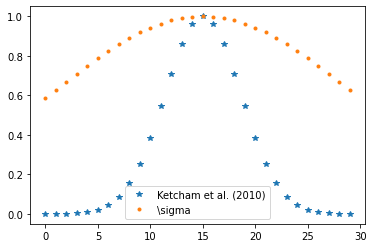

In [4]:
# given r which is equivalent to \sigma in a gaussian pdf
r = 14.5 # equivalent to standard deviation  
rc = np.ceil(r) # the smallest integer greater than r
xi = np.arange(0,2*rc,1)
g = np.exp(-(rc - xi)**2/(r**2/8))
gg = np.exp(-(1/2)*(xi - rc)**2/(r**2))
plt.plot(xi,g,'*', label='Ketcham et al. (2010)')
plt.plot(xi,gg,'.', label='\sigma')
plt.legend()

# Correlating the fracture measurement to permeability
So while reading (Zimmerman et al. 1996), I am realizing the that cubic law of Transmissevity $T = \frac{wa^3}{12}$, where $w~=$ is the width of the fracture, $a~=$ is the fracture aperature,that results in the permeability to be $k=\frac{a^2}{12}$ is insuffecient to estimate permeability. But since we have a statistical distribution of the fracture aperture, we might be able to produce a more robust result. I just haven't completely completely finish reading the paper yer

## References
- Zimmerman, Robert W., and Gudmundur S. Bodvarsson. "Hydraulic conductivity of rock fractures." Transport in porous media 23.1 (1996): 1-30.
- [Creating steronets using Python](http://geologyandpython.com/structural_geology.html)

## Loading the PSF file

In [5]:
psf_results_folder = os.path.join('.','results','runs','20220208')
psf_file = os.path.join(psf_results_folder,'7A-fractured-psf.dat')
psf_df = pd.read_table(psf_file)
psf_df.head()

,No.,View,Mdpt. X (vox),Mdpt. Y (vox),Mdpt. Z (vox),Mean PSF Radius (vox),St. Dev. (vox),Incident Angle (deg),Radial Distance (vox),Tangent Angle (deg)
0,1,Ortho Z,442.16,778.70,100.0,3.60,0.41,6.07,380.59,0.16
1,2,Ortho Z,496.94,767.73,100.0,3.66,0.32,2.66,380.78,3.08
2,3,Ortho Z,551.64,747.68,100.0,3.84,0.37,3.15,380.42,2.92
3,4,Ortho Z,628.91,700.49,100.0,2.83,0.46,19.74,380.29,5.87
4,5,Ortho Z,699.98,626.03,100.0,3.07,0.47,1.16,379.41,1.32


In [6]:
psf_stats = psf_df.describe()
psf_stats

,No.,Mdpt. X (vox),Mdpt. Y (vox),Mdpt. Z (vox),Mean PSF Radius (vox),St. Dev. (vox),Incident Angle (deg),Radial Distance (vox),Tangent Angle (deg)
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,81.000000
mean,41.500000,414.307805,446.390244,853.853659,3.385610,0.554268,8.694024,378.247805,2.680123
std,23.815261,213.033767,311.450835,668.188192,0.481315,0.288692,4.889114,5.826398,2.018319
min,1.000000,27.840000,14.840000,100.000000,2.140000,0.130000,0.890000,364.240000,0.020000
25%,21.250000,223.340000,70.987500,242.000000,3.095000,0.352500,5.710000,375.045000,1.090000
50%,41.500000,421.525000,602.010000,670.000000,3.420000,0.490000,8.260000,379.335000,2.410000
75%,61.750000,582.327500,738.140000,1596.000000,3.660000,0.680000,10.857500,380.572500,3.800000
max,82.000000,755.610000,778.700000,1810.000000,4.850000,1.690000,24.360000,389.960000,8.160000


## Fracture measurements
There are 1910 slices in this microCT volume. So in order to systematically measure the fracture, we choose 25 slices in the middle to measure the fracture. See cell output below. In addition, when the fracture biforcates, we have consistently chosen only the left branch of the fracture. 

<img src="images/bifurcating fracture.png" alt="bifurcating fracture" />

In [7]:
target_slices = np.linspace(100,1910-100,25,dtype='int')
print(target_slices)

[ 100  171  242  313  385  456  527  598  670  741  812  883  955 1026
 1097 1168 1240 1311 1382 1453 1525 1596 1667 1738 1810]


We used a PSF of **3.38**, and a Thin feature CT value of **10**

In [8]:
completed_slice_num = 1810

print('completed slices = ',target_slices[target_slices <= completed_slice_num])
print('remainig slices = ',target_slices[target_slices > completed_slice_num])
print('remainig slice count = ',len(target_slices[target_slices > completed_slice_num]))

completed slices =  [ 100  171  242  313  385  456  527  598  670  741  812  883  955 1026
 1097 1168 1240 1311 1382 1453 1525 1596 1667 1738 1810]
remainig slices =  []
remainig slice count =  0


In [9]:
frac_results_folder = os.path.join('.','results','runs','20220208')
frac_file  = os.path.join(frac_results_folder,'7A-fractured-fracture measurements.dat')

print('loaded data from ' + frac_file)

frac_df = pd.read_table(frac_file)
frac_df.head()

loaded data from .\results\runs\20220208\7A-fractured-fracture measurements.dat


,Name,Merit,View,Midpoint X (vox),Midpoint Y (vox),Midpoint Z (vox),Apparent Width (vox),Apparent Width (mm),Incident Angle (deg),Corrected Width (vox),Corrected Width (mm),Tile Mean App. Width (vox),Tile SD App. Width (vox),Tile Mean Corr. Width (vox),Tile Mean Corr. Width (mm),Feature Normal X,Feature Normal Y,Feature Normal Z
0,Trav0,0.022378,Ortho Z,347.363,735.386,100.0,1.027770,0.034225,20.0568,0.965436,0.032149,1.17152,0.081513,1.10047,0.036646,0.875356,0.441600,-0.196831
1,Trav1,0.022378,Ortho Z,347.363,735.386,100.0,1.027770,0.034225,20.0568,0.965436,0.032149,1.17152,0.081513,1.10047,0.036646,0.875356,0.441600,-0.196831
2,Trace2,0.009541,Ortho Z,346.309,734.854,100.0,1.149950,0.038294,16.9377,1.100070,0.036632,1.17297,0.092605,1.12208,0.037365,0.930161,0.280086,-0.237385
3,Trace2,0.030704,Ortho Z,346.087,733.448,100.0,1.091410,0.036344,10.9597,1.071510,0.035681,1.14877,0.078237,1.12782,0.037556,0.856785,0.479547,-0.189614
4,Trace2,0.038408,Ortho Z,347.460,732.977,100.0,0.954655,0.031790,20.8355,0.892226,0.029711,1.08902,0.141471,1.01781,0.033893,0.859539,0.413089,-0.300915


In [10]:
frac_df.describe()

,Merit,Midpoint X (vox),Midpoint Y (vox),Midpoint Z (vox),Apparent Width (vox),Apparent Width (mm),Incident Angle (deg),Corrected Width (vox),Corrected Width (mm),Tile Mean App. Width (vox),Tile SD App. Width (vox),Tile Mean Corr. Width (vox),Tile Mean Corr. Width (mm),Feature Normal X,Feature Normal Y,Feature Normal Z
count,17348.000000,17348.00000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000,17348.000000
mean,0.019473,418.68706,410.138477,960.991016,2.601314,0.086624,13.763489,2.494605,0.083070,2.614098,0.187333,2.507001,0.083483,0.916796,0.146080,-0.022037
std,0.046238,37.19719,195.440786,501.167691,1.103479,0.036746,10.000079,1.074027,0.035765,1.093952,0.118319,1.066057,0.035500,0.119420,0.231959,0.263823
min,0.000078,341.70700,26.606800,100.000000,0.000000,0.000000,0.047852,0.000000,0.000000,0.271671,0.033009,0.016049,0.000534,-0.706937,-0.699181,-0.706267
25%,0.005499,388.39075,245.037500,527.000000,1.786830,0.059501,6.271348,1.707213,0.056850,1.800438,0.123149,1.714240,0.057084,0.892880,-0.010401,-0.217772
50%,0.010399,418.72600,409.862000,955.000000,2.480560,0.082603,11.826550,2.380025,0.079255,2.486325,0.163482,2.389305,0.079564,0.942608,0.150477,-0.024846
75%,0.019522,451.92600,576.394250,1382.000000,3.239383,0.107872,19.121125,3.120232,0.103904,3.247430,0.219494,3.127502,0.104146,0.975477,0.306674,0.159126
max,0.955042,502.56500,777.140000,1810.130000,7.711880,0.256806,89.088900,6.636420,0.220993,7.026070,4.745170,6.535970,0.217648,0.999993,0.999880,0.878642


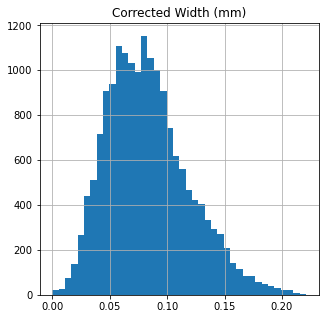

In [19]:
frac_df[['Corrected Width (mm)']].hist(bins=40, figsize=(5,5));

# Permeability Measurements

### Carolyn's results

| Confining Pressure | Perm ($m^2$) | error (+/-) |
|--------------------|-----------|-------------|
| 20 MPa | 1.1281E-16 | 2.8992E-18 |
| 30 MPa | 2.1728E-17 |	5.4409E-19 |
| 50 MPa | 5.0287E-18 |	1.4249E-19 |

In [73]:
experiment_data = {'Pc': [20, 30, 50], 'k':[1.128e-16, 2.172e-17,5.029e-18], 'error':[2.899e-18,5.441e-19,1.425e-19],'source':['experiment','experiment','experiment']}
perm_df = pd.DataFrame(experiment_data)
perm_df.head()

,Pc,k,error,source
0,20,1.128000e-16,2.899000e-18,experiment
1,30,2.172000e-17,5.441000e-19,experiment
2,50,5.029000e-18,1.425000e-19,experiment


In [74]:
apr_mean = 0.129246e-3
perm = apr_mean**2/12
perm_df = perm_df.append(pd.DataFrame({'Pc': [0], 'k':[perm], 'error':[np.nan],'source':['estimate using fracture aperture mean']}), ignore_index=True)

In [75]:
perm_df.sort_values(by=['Pc'], inplace=True)

In [76]:
perm_df

,Pc,k,error,source
3,0,1.392044e-09,NaN,estimate using fracture aperture mean
0,20,1.128000e-16,2.899000e-18,experiment
1,30,2.172000e-17,5.441000e-19,experiment
2,50,5.029000e-18,1.425000e-19,experiment


In [80]:
perm_df['Pc'].iloc[1:4]

0    20
1    30
2    50
Name: Pc, dtype: int64

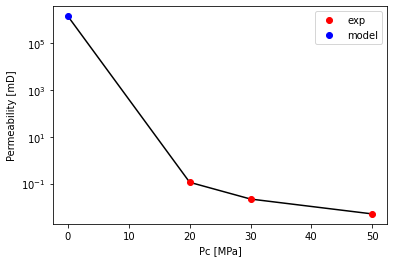

In [86]:
plt.semilogy(perm_df['Pc'], perm_df['k']*1013249965828.1448e3,'-k')
plt.semilogy(perm_df['Pc'].iloc[1:4], perm_df['k'].iloc[1:4]*1013249965828.1448e3,'or',label='exp')
plt.semilogy(perm_df['Pc'].iloc[0], perm_df['k'].iloc[0]*1013249965828.1448e3,'ob',label='cubic model 1')
plt.xlabel('Pc [MPa]')
plt.ylabel('Permeability [mD]')
plt.legend();